In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import re
import datetime as dt

In [82]:
cust_Acq= pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
spend = pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 2 - Credit Card Case Study\spend.csv")
payment =  pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")

In [83]:
cust_Acq.drop(labels= 'No', inplace=True, axis=1)
spend.drop(labels= 'Sl No:', inplace=True, axis=1)
payment.drop(labels= 'SL No:', inplace=True, axis=1)
payment.drop(labels= 'Unnamed: 4', inplace=True, axis=1)

In [84]:
cust_Acq.head(4)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt


In [85]:
spend.head(3)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46


In [86]:
spend['Month']= spend.Month.apply(lambda x: dt.datetime.strptime(x , "%d-%b-%y"))

In [87]:
spend.head(4)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47


In [88]:
payment= payment.dropna(axis=0)
payment.head(3)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06


In [89]:
payment['Month']= payment.Month.apply(lambda x : dt.datetime.strptime(x , "%d-%b-%y"))
payment.head(4)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12


## Q1. In the above dataset

### a. In case age is less than 18, replace it with mean of age values.

In [92]:
cust_Acq.loc[cust_Acq.Age < 18,'Age']= int(cust_Acq.Age.mean())

In [93]:
print("All the customers who have age less than 18 have been replaced by mean of the age column.\n")
cust_Acq.head()

All the customers who have age less than 18 have been replaced by mean of the age column.



,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
    (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [95]:
## Join Customer & Spend Table:

cust_spend = pd.merge(cust_Acq, spend, on= 'Customer')
cust_spend.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46


In [96]:
## Join Customer & Payment Table:

cust_payment = pd.merge(cust_Acq , payment , on='Customer')
cust_payment.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06


In [97]:
## Join Customer, Spend Table & Payment Table:

df = pd.merge(cust_spend , payment , on=['Customer','Month'])

In [98]:
cust_spend.loc[cust_spend.Limit < cust_spend.Amount,'Amount'] = cust_spend.Limit/2 
cust_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07


### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [100]:
cust_payment.loc[cust_payment.Limit < cust_payment.Amount,'Amount'] = cust_payment.Limit 
cust_payment.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88


## Q2. From the above dataset create the following summaries:

### (a.) How many distinct customers exist?

In [103]:
print("Number of distinct customers are : ", cust_Acq.Customer.nunique())

Number of distinct customers are :  100


### (b.) How many distinct categories exist?

In [105]:
print("Number of distinct Categoies of customer segments are :", cust_Acq["Segment"].value_counts().count())

Number of distinct Categoies of customer segments are : 5


### (c.) What is the average monthly spend by customers?

In [107]:
spend['Year'] = spend.Month.apply(lambda x : dt.datetime.strftime(x,'%Y'))
spend['Months'] = spend.Month.apply(lambda x : dt.datetime.strftime(x,'%B'))
average_monthly_spend = round(spend.groupby(['Year','Months'])[['Amount']].mean(),2)
average_monthly_spend

Amount
Year Months              
2004 April      235272.04
     February   221215.27
     January    251712.07
     March      232146.12
     May        217539.24
     November   270486.40
     September  310923.38
2005 April      252181.33
     August     233734.63
     December   147503.06
     February   229802.28
     January    292741.37
     July       229116.66
     June       262688.11
     May        245696.52
     November   286143.32
     October    194568.64
     September  188666.20
2006 April      232468.97
     August     240699.72
     December   270470.98
     February   253858.26
     January    282058.01
     July       287505.10
     June       177252.39
     March      247166.08
     May        236162.74
     November   182841.29
     October    236136.34
     September  158520.09

### (d.) What is the average monthly repayment by customers?

In [109]:
payment['Year'] = payment.Month.apply(lambda x : dt.datetime.strftime(x,'%Y'))
payment['Months'] = payment.Month.apply(lambda x : dt.datetime.strftime(x,'%B'))
average_monthly_repayment = round(payment.groupby(['Year','Months'])[['Amount']].mean(),2)
average_monthly_repayment

Amount
Year Months              
2004 April      259141.68
     February   256702.63
     January    243489.65
     March      252585.28
     May        226162.72
     November   209592.24
     September  184487.85
2005 April      212688.63
     August     264430.92
     December   320379.34
     February   238829.27
     January    240548.10
     July       239871.48
     June       210199.82
     May        263207.37
     November   256695.12
     October    219849.96
     September  247700.17
2006 April      275472.25
     August     224143.99
     December   252736.57
     February   284489.57
     January    293475.39
     July       257936.38
     June       251990.45
     March      240851.27
     May        256920.88
     November   199399.20
     October    260765.48
     September  262533.88

### (e.) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly   Profit. Monthly Profit = Monthly repayment - Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [111]:
monthly_repayment= payment.groupby(['Year','Months'])[['Amount']].sum().rename(columns= {'Amount':'Repayment'})
monthly_spend= spend.groupby(['Year','Months'])[['Amount']].sum().rename(columns= {'Amount':'Spend'})
profit = pd.merge(monthly_repayment,monthly_spend , on=['Year','Months'] , how= 'outer').fillna(0)
profit['Monthly_profit']=profit.Repayment- profit.Spend
profit['Profit']= np.where(profit.Monthly_profit >0 , profit.Monthly_profit * 0.029 , 0)
profit

Repayment        Spend  Monthly_profit        Profit
Year Months                                                           
2004 April       7774250.37   6587617.04      1186633.33   34412.36657
     February    6930971.03   6194027.56       736943.47   21371.36063
     January    68177101.94  77275605.08     -9098503.14       0.00000
     March       3788779.21   3250045.67       538733.54   15623.27266
     May         5654068.02   3045549.31      2608518.71   75647.04259
     November    3143883.57   3786809.57      -642926.00       0.00000
     September   2951805.58   4352927.37     -1401121.79       0.00000
2005 April       6380658.94   7061077.14      -680418.20       0.00000
     August      9783944.10   6544569.76      3239374.34   93941.85586
     December    3844552.03   2065042.84      1779509.19   51605.76651
     February   38690340.95  38606783.01        83557.94    2423.18026
     January     6494798.65   8196758.44     -1701959.79       0.00000
     July        2878457.75   3207633.29      -329175.54       0.00000
     June        7567193.46  11032900.74     -3465707.28       0.00000
     May        40533934.65  34397512.16      6136422.49  177956.25221
     November   10781195.04  12018019.56     -1236824.52       0.00000
     October     2638199.48   2723960.97       -85761.49       0.00000
     September   2972402.04   2641326.83       331075.21    9601.18109
2006 April      24792502.67  21852082.95      2940419.72   85272.17188
     August      2689727.91   3369796.04      -680068.13       0.00000
     December    3032838.83   3786593.73      -753754.90       0.00000
     February   11095093.04  10662046.95       433046.09   12558.33661
     January     3521704.67   3948812.09      -427107.42       0.00000
     July        9543646.18   8050142.77      1493503.41   43311.59889
     June        3023885.44   2481533.41       542352.03   15728.20887
     March      49133658.43  53635040.37     -4501381.94       0.00000
     May        22352116.99  13225113.46      9127003.53  264683.10237
     November    5383778.33   5119556.12       264222.21    7662.44409
     October     3129185.76   3305908.69      -176722.93       0.00000
     September   3150406.57   2219281.27       931125.30   27002.63370

### (f.) What are the top 5 product types?

In [113]:
### Top 5 Product type acc. to Spend

top_5_product = spend.groupby('Type')[['Amount']].sum().sort_values(by='Amount', ascending= False).rename(columns={'Amount':'Total_Spend'}).reset_index().head()
top_5_product

,Type,Total_Spend
0,PETRO,49863174.09
1,CAMERA,41481571.96
2,FOOD,37773338.43
3,TRAIN TICKET,33067077.15
4,AIR TICKET,32955445.42


In [114]:
### Top 5 Product type acc. to Repeted Product(Count)

top_5_product = spend.groupby('Type')[['Customer']].count().sort_values(by='Customer', ascending= False).rename(columns={'Customer':'Count'}).reset_index().head()
top_5_product

,Type,Count
0,PETRO,200
1,CAMERA,160
2,FOOD,160
3,AIR TICKET,147
4,TRAIN TICKET,132


### (g.) Which city is having maximum spend?

In [116]:
max_spend = cust_spend.groupby('City')[['Amount']].sum().sort_values(by='Amount', ascending= False).rename(columns={'Amount':'Total_Spend'}).reset_index().head(1)
print(max_spend.City.to_string(index= False) , "is having maximun spend with spends : ", max_spend.Total_Spend.to_string(index= False))
max_spend

COCHIN is having maximun spend with spends :  45963513.5


,City,Total_Spend
0,COCHIN,45963513.5


### (h.) Which age group is spending more money?

In [118]:
cust_spend['Age_Group']= pd.cut(cust_spend.Age , [15,30,45,60,75,80], labels=['16-30','31-45','46-60','61-75','76-90'])
group_spend = cust_spend.groupby('Age_Group',observed= True)[['Amount']].sum().sort_values(by='Amount', ascending= False).rename(columns={'Amount':'Spend_Amt'}).reset_index()
print('The Age group which spending more Money : \n')
group_spend.head(1)

The Age group which spending more Money : 



,Age_Group,Spend_Amt
0,46-60,68690512.18


### (i.) Who are the top 10 customers in terms of repayment?

In [120]:
payment.groupby('Customer')[['Amount']].sum().sort_values(by='Amount' , ascending= False).rename(columns={'Amount':'Payment_Amt'}).head(10).reset_index()

,Customer,Payment_Amt
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A22,9372561.68
4,A21,9056336.15
5,A43,8489871.46
6,A45,8448334.87
7,A12,8334760.16
8,A48,8292416.75
9,A14,7943268.63


### Q3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [397]:
year=cust_spend.Month.dt.year
city_wise = pd.crosstab(index= [cust_spend.City ,year], columns=cust_spend.Product , values=cust_spend.Amount , aggfunc='sum')
city_wise

Product                  Gold    Platimum      Silver
City       Month                                     
BANGALORE  2004    9289878.54  1112732.30  1291852.58
           2005   12892362.99   912284.97   830612.34
           2006   12030611.09   685831.27  1415480.94
BOMBAY     2004    6987853.53   897264.94   532089.03
           2005    8983018.28   711804.94   508988.54
           2006    7917144.31   972130.01  1092833.80
CALCUTTA   2004    7477140.98  2037690.30   500006.00
           2005   10303355.80  4434696.31   440147.06
           2006   11167532.77  3589606.66  1157956.42
CHENNAI    2004    1059618.50  3535652.38   282056.86
           2005    3740945.58  5053956.32   377184.49
           2006    2704288.62  5024923.40   350009.50
COCHIN     2004    7315850.15  3419904.07   814229.62
           2005   12110613.03  4960921.71   652269.38
           2006   10499142.38  4920592.29  1269990.87
DELHI      2004    2806495.00   283512.89   768172.30
           2005    1964845.27   494157.86   612311.21
           2006    2957103.32   176788.72   854899.97
PATNA      2004    2072567.90  1113069.60   756684.10
           2005    3252615.77  2883231.07   950094.19
           2006    2276181.69  1256137.65   700005.00
TRIVANDRUM 2004    2415102.84  2161676.67   209667.48
           2005    1240375.85  3601443.30   269912.99
           2006    2735710.87  2147403.75   555862.12

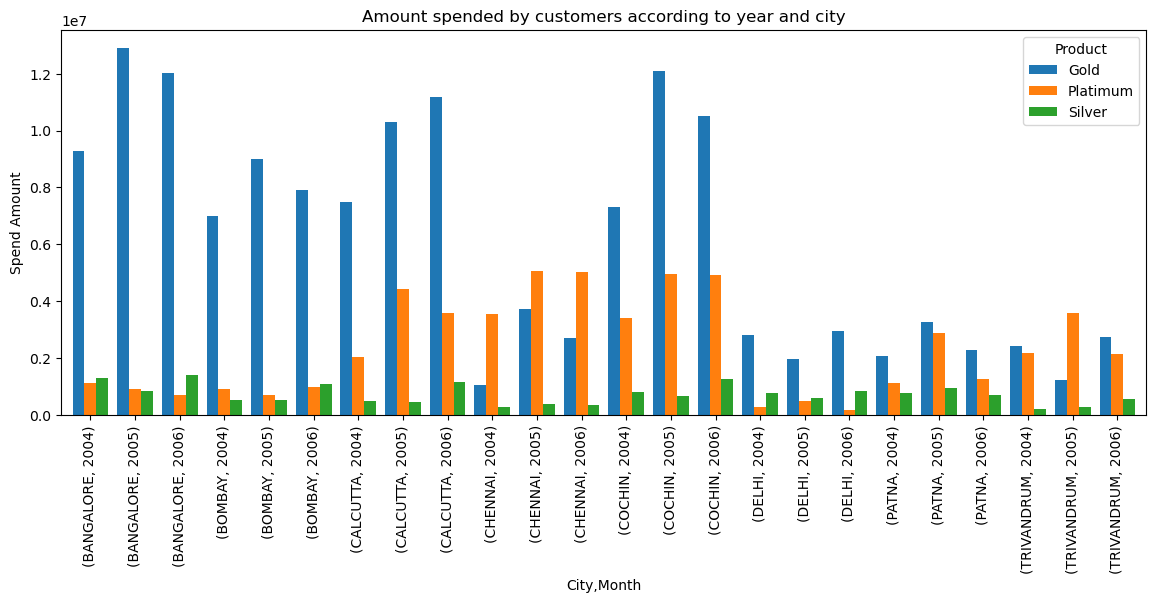

In [403]:
city_wise.plot(kind="bar",figsize=(14,5),width=0.8 )
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

### Q4. Create graphs for

#### (a.) Monthly comparison of total spends, city wise

In [483]:
month= cust_spend.Month.dt.month_name()
monthly_city_wise= pd.crosstab(index= month , columns=cust_spend.City , values= cust_spend.Amount , aggfunc='sum')
monthly_city_wise

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Month,,,,,,,,
April,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
August,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
December,422167.24,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
February,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
January,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
July,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
June,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
March,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48


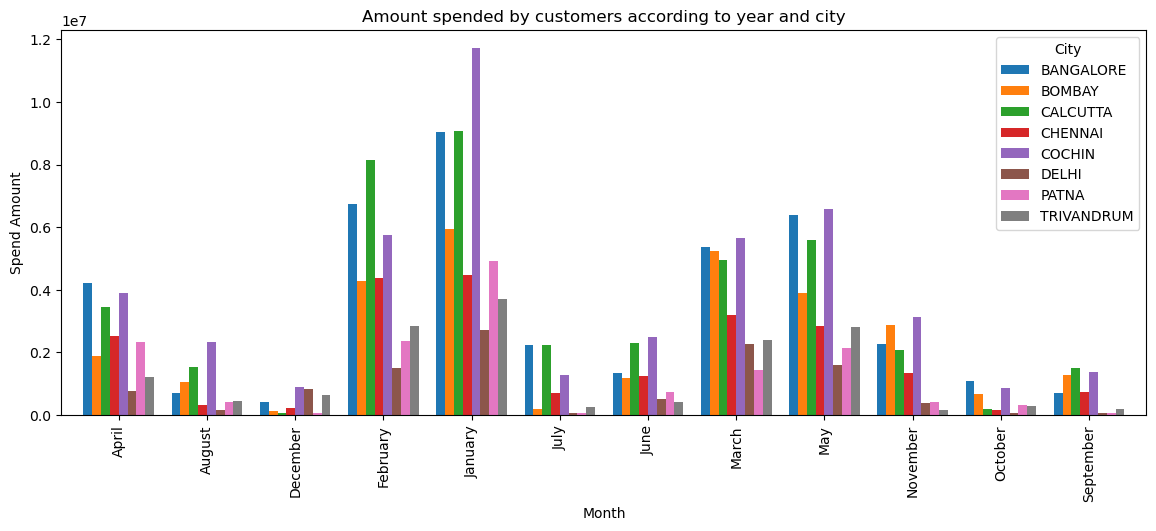

In [519]:
monthly_city_wise.plot(kind="bar",figsize=(14,5),width=0.8 )
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

#### (b.) Comparison of yearly spend on air tickets

In [646]:
year = cust_spend.Month.dt.year
air_tickets = cust_spend.groupby([year,"Type"])[["Amount"]].sum().reset_index()
filtered = air_tickets.loc[air_tickets["Type"]=="AIR TICKET"]
filtered

,Month,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


<Axes: title={'center': 'AIR TICKET'}, xlabel='Month'>

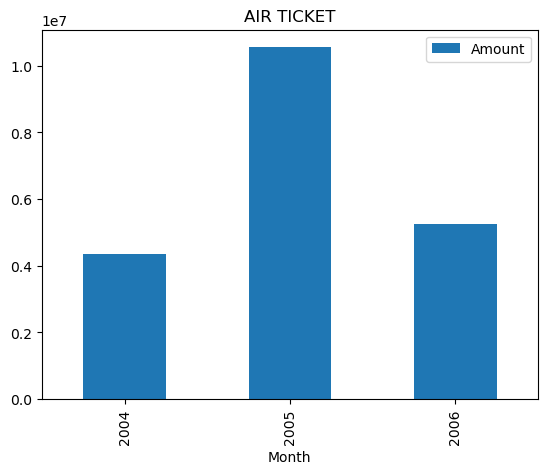

In [682]:
filtered.plot(kind='bar', y= 'Amount' , x='Month', title='AIR TICKET')

#### (c.) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [778]:
month = cust_spend.Month.dt.month_name()
monthly_spend1 = cust_spend.groupby([month,"Product"])[["Amount"]].sum().reset_index()
monthly_spend1

,Month,Product,Amount
0,April,Gold,13170572.59
1,April,Platimum,5182493.86
2,April,Silver,1902322.65
3,August,Gold,4954030.42
4,August,Platimum,1714762.80
5,August,Silver,293109.82
6,December,Gold,2332940.96
7,December,Platimum,750156.19
8,December,Silver,200537.90
9,February,Gold,24779179.55


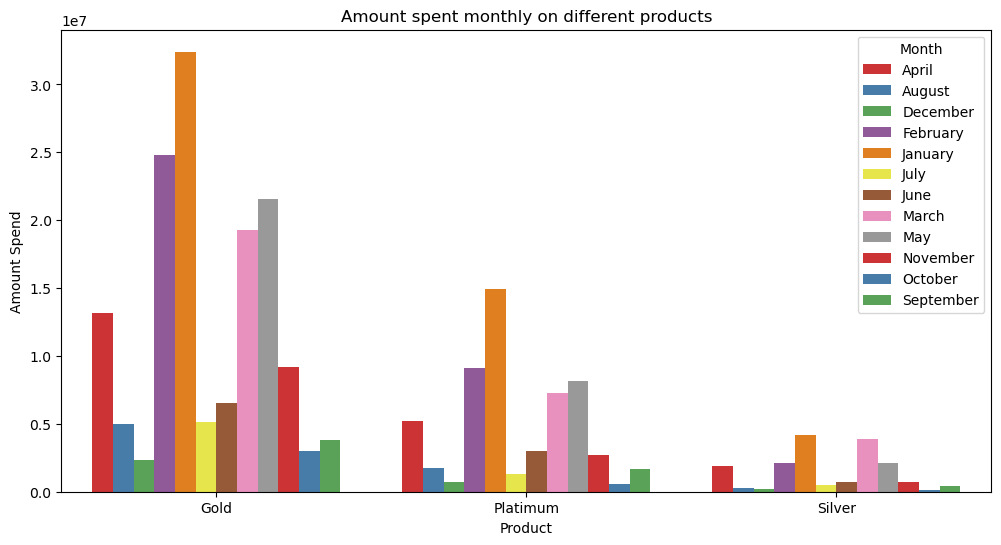

In [786]:
plt.figure(figsize=(12,6))
sns.barplot(data= monthly_spend1 , x= 'Product' ,  y= 'Amount' , hue= 'Month' , palette='Set1')
plt.ylabel("Amount Spend")
plt.title("Amount spent monthly on different products")
plt.show()

### Q5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [1097]:
def summary_report(pro_type,time):
    filtered = cust_payment[cust_payment.Product.str.lower()==pro_type.lower()]
    year= cust_payment.Month.dt.year
    month_name= cust_payment.Month.dt.month_name()

    if(time.lower() == 'yearly'):
        #Year= year                  (already exist in filtered table)
        cross_table1 = filtered.groupby(['Product','City','Year','Customer'])[['Amount']].sum().sort_values(by=['City','Year','Amount'],ascending =[True, True, False])
    elif(time.lower() == 'monthly'):
        filtered['Month_name']= month_name       
        cross_table1 = filtered.groupby(['Product','City','Month_name','Customer'])[['Amount']].sum().sort_values(by=['City','Month_name','Amount'],ascending =[True, True, False])
    else:
        raise ValueError("time_period must be either 'yearly' or 'monthly'")
        
    return cross_table1
    
summary_report('Gold','Monthly')


C:\Users\hp\AppData\Local\Temp\ipykernel_10488\3234301287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Month_name']= month_name


Amount
Product City       Month_name Customer            
Gold    BANGALORE  April      A14        812582.20
                              A43        612541.80
                              A1         508949.16
                              A13        494392.40
                              A92        459105.69
...                                            ...
        TRIVANDRUM February   A28        968709.79
                   January    A28       1034461.46
                   July       A28        380460.40
                   March      A28       1547067.86
                   May        A28       2233253.41

[211 rows x 1 columns]